# YANIS TAZI HOMEWORK. 1 DEEP LEARNING SYSTEMS
#### yt1600@nyu.edu

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import math
import random
from scipy.interpolate import spline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import copy

In [27]:
plt.rcParams["figure.figsize"] = (15,5)

# Problem 1 - Linear Separability

# 1.

In [28]:
x1=[-1,1,-3,4,-1,1,-5,4]
x2=[-1,1,-3,4,1,-1,2,-8]
Classes=[0,0,0,0,1,1,1,1]

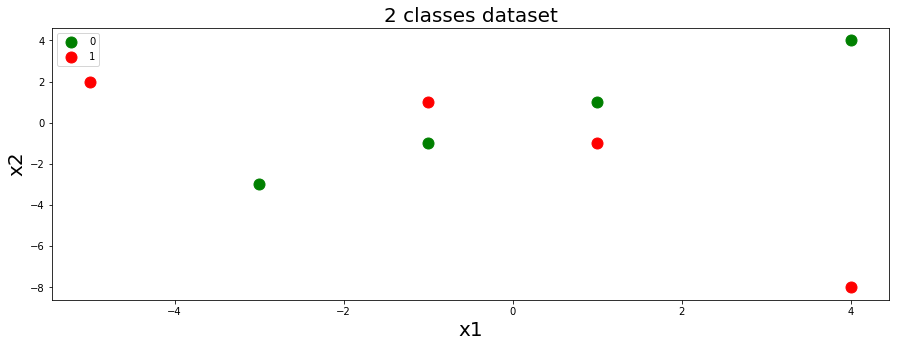

In [29]:
data = {'x1': x1,'x2': x2,'Classes':Classes}
data=pd.DataFrame(data=data)
groups = data.groupby("Classes")
for name, group in groups:
    plt.plot(group["x1"], group["x2"], marker=".", linestyle="", label=name,c=ListedColormap(('green', 'red'))(name),markersize=22)
plt.title("2 classes dataset",fontsize=20)
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.legend()
plt.show()

#### 2 sets are said to be linearly separable if we can find a hyperplane that separate completely the elements from those  2 sets . In a 2D problem, the hyperplane will just be a separation line and therefore we just need to find a linear decision. boundary that will separate the green from the red dots .

#### It is obvious that we can not find a line that will separate the two classes . they are other ways to demonstrate this :
#### - show that the convex hull of the two classes intersect.
#### - perceptron training will not converge for non linearly separable dataset

# 2.

#### After trying several combinations , we can find  a 1-dimensional representation z in terms of x1 and x2 :
#### $ z= | x_1^2 - x_2^2 + max(x_1,x_2)-min(x_1,x_2) |$

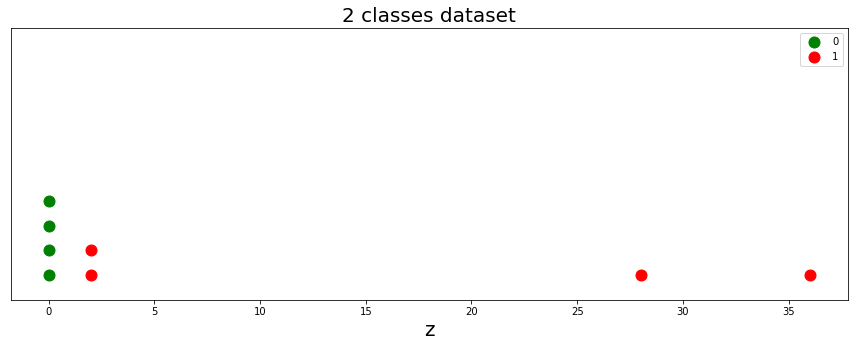

In [30]:
x1=[-1,1,-3,4,-1,1,-5,4]
x2=[-1,1,-3,4,1,-1,2,-8]
Classes=[0,0,0,0,1,1,1,1]
data=pd.DataFrame(data=data)
data["z"] = np.abs(np.square(x1)-np.square(x2)+np.maximum(x1,x2)-np.minimum(x1,x2))
groups = data.groupby("Classes")
for name, group in groups:
    plt.plot(group["z"], [0,0.1,0.2,0.3] if name==0  else[0,0.1,0,0], marker=".", linestyle="", label=name,c=ListedColormap(('green', 'red'))(name),markersize=22)
plt.ylim(-0.1,1)
plt.yticks([])
plt.title("2 classes dataset",fontsize=20)
plt.xlabel('z',fontsize=20)

plt.legend()


# 3-

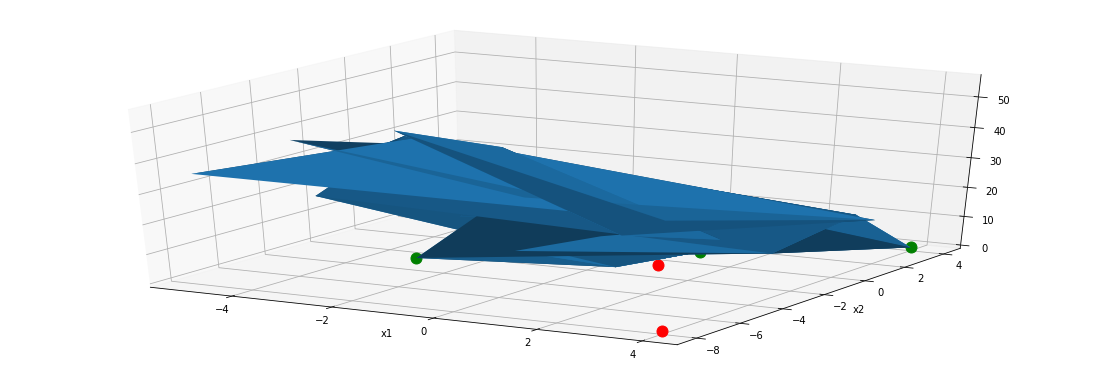

In [31]:




X1, X2 = np.meshgrid(data.x1, data.x2)
z = np.abs(np.square(X1)-np.square(X2)+np.maximum(X1,X2)-np.minimum(X1,X2))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X1, X2, z)
plt.xlabel('x1')
plt.ylabel('x2')
for name, group in groups:
    plt.plot(group["x1"], group["x2"],[0]*4, marker=".", linestyle="", label=name,c=ListedColormap(('green', 'red'))(name),markersize=22)
plt.show()


# 4-

#### When the data is not linearly separable, a linear classifier will fail to determine where the decision boundary is. The idea of non linear transformation is to still be able to use this type of classifier but before that we need to perform a non linear transformation of the data such that the data is linearly separable in this new space.

# Problem 2-

# 1.

#### $ \mathbb{E}[(g(x)-y)^2]= \mathbb{E}(g(x)^2)+\mathbb{E}(y^2)-2\mathbb{E}(g(x)*y)$ 
#### We use Lemma : $\mathbb{E}([(X-\mathbb{E}(X)]^2)+\mathbb{E}(X)^2= \mathbb{E}(X^2)$ and the fact that : $\mathbb{E}(y)=f(X)$ because $\mathbb{E}(\epsilon) =0$
#### Therefore, we have :  $ \mathbb{E}[(g(x)-y)^2]= \mathbb{E}[\{g(x)-\mathbb{E}[g(x)]\}^2] + \mathbb{E}(g(x))^2 - 2 \mathbb{E}(g(x))f(x) + \mathbb{E}[\{y-f(x)\}^2] + f(x)^2$
#### $ \mathbb{E}[(g(x)-y)^2]= (\mathbb{E}(g(x))-f(x))^2 + \mathbb{E}[\{g(x)-\mathbb{E}[g(x)]\}^2] +  \mathbb{E}[\{y-f(x)\}^2]$
#### $ \boxed{\mathbb{E}(MSE) = Bias^2 + Variance + Noise}$, with $Bias= (\mathbb{E}(g(x))-f(x))^2$, $Variance = mathbb{E}[\{g(x)-\mathbb{E}[g(x)]\}^2]$ and $ Noise = \mathbb{E}[\{y-f(x)\}^2]$

# 2.

In [32]:
def function_exercice2(x):
    np.random.seed(17)
    return(x +math.sin(1.5*x))


In [33]:
num_points=20
random.seed(17)
X=np.array([random.uniform(0.,10.) for i in range(20)])
f_X= np.array([function_exercice2(x) for x  in X])
np.random.seed(17)
y_X= np.array([f + np.random.normal(0.3)  for  f in f_X])
### Smoothing
X_new = np.linspace(min(X), max(X), 1000)
f_X_new = np.array([function_exercice2(x) for x  in X_new])





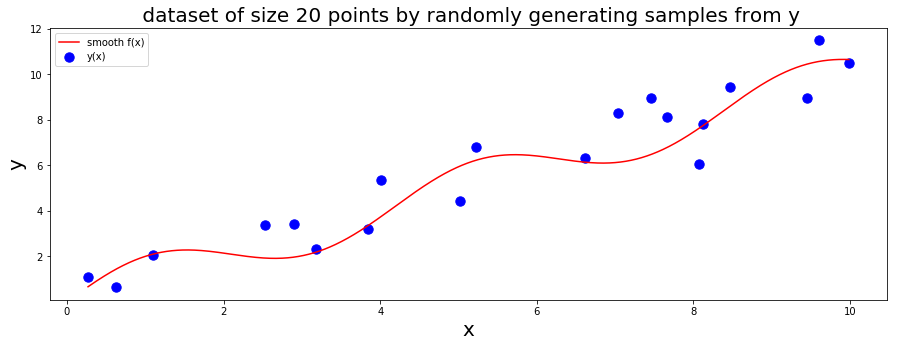

In [34]:
plt.scatter(X,f_X,c='red',marker='')
plt.scatter(X,y_X,marker='.',c='blue',label='y(x)',s=350)
plt.plot(X_new, f_X_new,c='red',label='smooth f(x)')
plt.legend()
plt.title(" dataset of size 20 points by randomly generating samples from y",fontsize=20)
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.show() 

# 3.

L2-norm for poly degree 1: 4.326758048196564
L2-norm for poly degree 3: 4.298359111628119
L2-norm for poly degree 10: 3.888244478085102


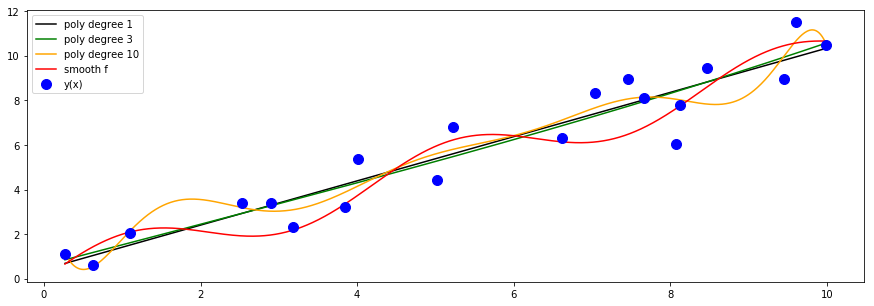

In [35]:
poly_deg_1 = np.poly1d(np.polyfit(X,y_X,deg=1))   ## degree 1
poly_deg_3 = np.poly1d(np.polyfit(X,y_X,deg=3))   ## degree 3
poly_deg_10 = np.poly1d(np.polyfit(X,y_X,deg=10))   ## degree 10

plt.plot(np.linspace(min(X), max(X), 1000),poly_deg_1(np.linspace(min(X), max(X), 1000)),c='black',label='poly degree 1')
plt.plot(np.linspace(min(X), max(X), 1000),poly_deg_3(np.linspace(min(X), max(X), 1000)),c='green',label='poly degree 3')
plt.plot(np.linspace(min(X), max(X), 1000),poly_deg_10(np.linspace(min(X), max(X), 1000)),c='orange',label='poly degree 10')
plt.plot(X_new, f_X_new,c='red',label='smooth f')
plt.plot(X,y_X,linestyle='',marker='.',c='blue',markersize=20,label='y(x)')
plt.legend()

print ("L2-norm for poly degree 1: "+str(np.linalg.norm(y_X-poly_deg_1(X))))
print ("L2-norm for poly degree 3: "+str(np.linalg.norm(y_X-poly_deg_3(X))))
print ("L2-norm for poly degree 10: "+str(np.linalg.norm(y_X-poly_deg_10(X))))

####  As expected , low complexity (degree 1 leads to underfitting and therefore high bias  ) while high complexity (degree 10 leads to overfit and therefore low bias on the training). It is clear when degree=10, that we fit the noise . It seems that a good tradeoff will be to chose a polynomial degree between 3 and 10 like  degree 7 to try to keep a relatively low bias on the training data while also keeping a relatively low variance compared to degree 10.

# 4.

In [36]:
n_repeat=100
percentage_train = 0.8
percentage_test = 0.2
n_samples = 50

def f(x):
    return ((x +np.sin(1.5*x)))
    
def generate(n_samples, epsilon=0.3, n_repeat=1,X_seed=17,y_seed=17):
    np.random.seed(X_seed)   ## to make sure we use different seeds for training vs testing
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        np.random.seed(seed=y_seed)
        y = f(X) + np.random.normal(0.0, epsilon, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            np.random.seed(i)
            y[:, i] = f(X) + np.random.normal(0.0, epsilon, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=int(percentage_train*n_samples),y_seed=i)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=int(percentage_test*n_samples), n_repeat=n_repeat,X_seed=9)    



### Make sure that X_test and X do not intersect to test only on unseen data !


print("Do X and X_test intersect ?" + " NO , we can continue !" if len(np.intersect1d(X,X_test))==0 else 'Yes !''\n','\n')

for deg in range(1,16):
    y_predict = np.zeros((int(percentage_test*n_samples), n_repeat))

    for i in range(n_repeat):
        poly = np.poly1d(np.polyfit(X_train[i][:,0],y_train[i],deg=deg))
        y_predict[:, i] = poly(X_test[:,0])
        
    
    y_error = np.zeros(int(percentage_test*n_samples))

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)
    y_noise = np.var(y_test, axis=1)
    y_bias = np.square(np.squeeze(f(X_test)) - np.mean(y_predict,axis=1))
    y_var = np.var(y_predict,axis=1)


    print(" DEGREE {0} = {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.2f} (noise)".format(deg,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

Do X and X_test intersect ? NO , we can continue ! 

 DEGREE 1 = 0.5271 (error) = 0.4387 (bias^2)  + 0.0039 (var) + 0.09 (noise)
 DEGREE 2 = 0.5695 (error) = 0.4767 (bias^2)  + 0.0060 (var) + 0.09 (noise)
 DEGREE 3 = 0.5793 (error) = 0.4838 (bias^2)  + 0.0093 (var) + 0.09 (noise)
 DEGREE 4 = 0.5038 (error) = 0.4024 (bias^2)  + 0.0136 (var) + 0.09 (noise)
 DEGREE 5 = 0.6701 (error) = 0.5527 (bias^2)  + 0.0211 (var) + 0.09 (noise)
 DEGREE 6 = 0.5570 (error) = 0.4258 (bias^2)  + 0.0352 (var) + 0.09 (noise)
 DEGREE 7 = 0.3590 (error) = 0.1917 (bias^2)  + 0.0747 (var) + 0.09 (noise)
 DEGREE 8 = 0.2795 (error) = 0.0810 (bias^2)  + 0.1054 (var) + 0.09 (noise)
 DEGREE 9 = 0.2672 (error) = 0.0027 (bias^2)  + 0.1703 (var) + 0.09 (noise)
 DEGREE 10 = 0.3860 (error) = 0.0036 (bias^2)  + 0.2886 (var) + 0.09 (noise)
 DEGREE 11 = 0.7076 (error) = 0.0024 (bias^2)  + 0.6113 (var) + 0.09 (noise)
 DEGREE 12 = 1.2911 (error) = 0.0172 (bias^2)  + 1.1793 (var) + 0.09 (noise)
 DEGREE 13 = 2.1883 (error) = 0.

## it seems like the best model is the degree 9.  It seems like the best tradeoff between bias and variance and this is also reflected in the RMSE.

# 5.

In [37]:
n_repeat=100
percentage_train = 0.8
percentage_test = 0.2
n_samples = 50



X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=int(percentage_train*n_samples),y_seed=i)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=int(percentage_test*n_samples), n_repeat=n_repeat,X_seed=9)    



### Make sure that X_test and X do not intersect to test only on unseen data !


print("Do X and X_test intersect ?" + " NO , we can continue !" if len(np.intersect1d(X,X_test))==0 else 'Yes !''\n','\n')

for deg in [10]:
    y_predict = np.zeros((int(percentage_test*n_samples), n_repeat))

    for i in range(n_repeat):
        poly = np.poly1d(np.polyfit(X_train[i][:,0],y_train[i],deg=deg))
        y_predict[:, i] = poly(X_test[:,0])
        
    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(int(percentage_test*n_samples))

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)
    y_noise = 0.3**2
    y_bias = np.square(np.squeeze(f(X_test)) - np.mean(y_predict,axis=1))
    y_var = np.var(y_predict,axis=1)


    print(" (DEGREE) {0} = {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.2f} (noise)".format(deg,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

Do X and X_test intersect ? NO , we can continue ! 

 (DEGREE) 10 = 0.3860 (error) = 0.0036 (bias^2)  + 0.2886 (var) + 0.09 (noise)


In [38]:
n_repeat=100
percentage_train = 0.8
percentage_test = 0.2
n_samples = 50



X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=int(percentage_train*n_samples),y_seed=i)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=int(percentage_test*n_samples), n_repeat=n_repeat,X_seed=9)    



### Make sure that X_test and X do not intersect to test only on unseen data !


print("Do X and X_test intersect ?" + " NO , we can continue !" if len(np.intersect1d(X,X_test))==0 else 'Yes !''\n','\n')
alpha_opt = 0.45
for alpha in [0,0.45]:  ### alpha is 0 means no regularization
    y_predict = np.zeros((int(percentage_test*n_samples), n_repeat))
    
    for i in range(n_repeat):
        
        df=pd.DataFrame(columns=['x_' + str(j) for j in range(1,11)])
        df['x_1'] = [item for sublist in X_train[i] for item in sublist]
        for j in range(2,11):
            df['x_' + str(j)] = [ x**j for x in df['x_1'] ]
        df['y'] = y_train[i]
        
        df_test=pd.DataFrame(columns=['x_' + str(j) for j in range(1,11)])
        df_test['x_1'] = [item for sublist in X_test for item in sublist]
        for j in range(2,11):
            df_test['x_' + str(j)] = [ x**j for x in df_test['x_1'] ]
  
        
        #reg = linear_model.RidgeCV(alphas=np.linspace(1e-3, 100, 100))
        
        reg = linear_model.Ridge(alpha=alpha)
        reg.fit(df.loc[:, df.columns != 'y'],df['y'])
        y_predict[:, i] = reg.predict(df_test)
       
        
    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(int(percentage_test*n_samples))

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)
    y_noise = 0.3**2
    y_bias = np.square(np.squeeze(f(X_test)) - np.mean(y_predict,axis=1))
    y_var = np.var(y_predict,axis=1)


    print(" (alpha) {0} = {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.2f} (noise)".format(alpha,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))

Do X and X_test intersect ? NO , we can continue ! 

 (alpha) 0 = 0.3860 (error) = 0.0036 (bias^2)  + 0.2886 (var) + 0.09 (noise)
 (alpha) 0.45 = 0.3649 (error) = 0.0173 (bias^2)  + 0.2534 (var) + 0.09 (noise)


#### The regularized model has  a higher bias probably due to the fact that we decreased the complexity of the model using regularization but by decreasing the complexity we decreased also the variance and the overall cost is lower since the decrease in variance was higher than the increase in bias ! Therefore, by definition of MSE, the regularized model has a lower MSE . This underlines the importance of regularization in ML Models.

# Problem 3-

## Dataset 1 :
#### This dataset shows information about participants to a mathematic conference . The goal is to predict based on categorical features whether or not the registered people were presentat the conference .
#### number of features: 6
#### number of instances: 246 
#### number of classes : 2 (very umbalanced classes)
#### number of numerical features: 0
#### number of categorical features: 6 tShirtSize has 2 missing values that we replace by the most frequent category

## Dataset 2 :
#### This dataset is much larger and richer than the previous one with 4 times more features and 15 times more instances . It is also a classification problem with three classes.
#### number of features: 30
#### number of instances: 3772
#### number of classes :3 (very umbalanced classes)
#### number of numerical features: 6
#### number of categorical features: 24 

#### The data has no missing values

# 2-

In [57]:
def response_to_question2(data,target):
    train_time_RF = []
    accuracy_RF = []
    train_time_GB = []
    accuracy_GB = []
    for i in np.linspace(0.1,1,10):
        data_sub = data.sample(frac=i,random_state=17)
        X = data_sub.loc[:,data_sub.columns!=target]
        y = data_sub[target]
        X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
        clf_RF = RandomForestClassifier(random_state=0)
        start = time.time()
        clf_RF.fit(X_train, y_train)
        stop = time.time()
        train_time_RF.append(stop-start)
        accuracy_RF.append(accuracy_score(y_test,clf_RF.predict(X_test)))
        clf_GB = GradientBoostingClassifier(random_state=0)
        start = time.time()
        clf_GB.fit(X_train, y_train)
        stop = time.time()
        train_time_GB.append(stop-start)
        accuracy_GB.append(accuracy_score(y_test,clf_GB.predict(X_test)))
        
        
    print("Random Forest default parameters :")
    for i in range(10):
        print('Model accuracy :'+ str(accuracy_RF[i]) + ' and corresponding training time :'  + str(train_time_RF[i]))
    print('\n'*2)
    print("Gradient Boosting default parameters :")
    for i in range(10):
        print('Model accuracy :'+ str(accuracy_GB[i]) + ' and corresponding training time :'  + str(train_time_GB[i]))
    
    plt.plot(np.linspace(0.1,1,10)*0.8*len(data),accuracy_RF,label='RF')
    plt.plot(np.linspace(0.1,1,10)*0.8*len(data),accuracy_GB,label='GB')
    plt.xlabel('Training data size')
    plt.ylabel('Accuracy on Testing data')
    plt.legend()
    plt.show()

    plt.plot(np.linspace(0.1,1,10)*0.8*len(data),train_time_RF,label='RF')
    plt.plot(np.linspace(0.1,1,10)*0.8*len(data),train_time_GB,label='GB')
    plt.xlabel('Training data size')
    plt.ylabel('Training time ')
    plt.legend()
    plt.show()

# Dataset 1:

Random Forest default parameters :
Model accuracy :0.8 and corresponding training time :0.007452964782714844
Model accuracy :0.8 and corresponding training time :0.006682872772216797
Model accuracy :0.8666666666666667 and corresponding training time :0.0067751407623291016
Model accuracy :0.7 and corresponding training time :0.0069980621337890625
Model accuracy :0.72 and corresponding training time :0.005280971527099609
Model accuracy :0.9 and corresponding training time :0.005245208740234375
Model accuracy :0.7142857142857143 and corresponding training time :0.0054051876068115234
Model accuracy :0.8 and corresponding training time :0.005357027053833008
Model accuracy :0.7333333333333333 and corresponding training time :0.005544900894165039
Model accuracy :0.9 and corresponding training time :0.005609989166259766



Gradient Boosting default parameters :
Model accuracy :0.8 and corresponding training time :0.03229784965515137
Model accuracy :0.7 and corresponding training time :0.037772

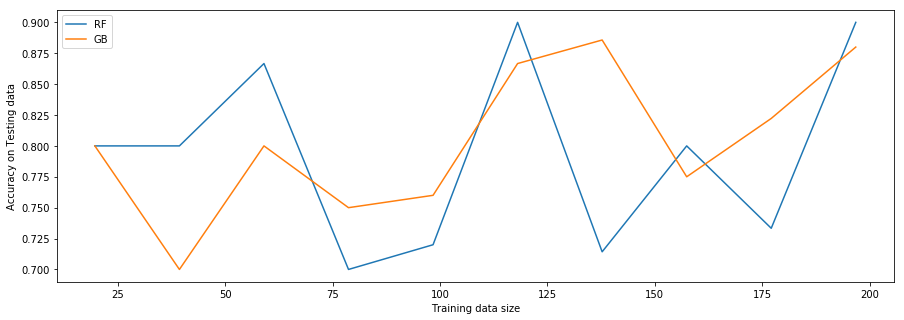

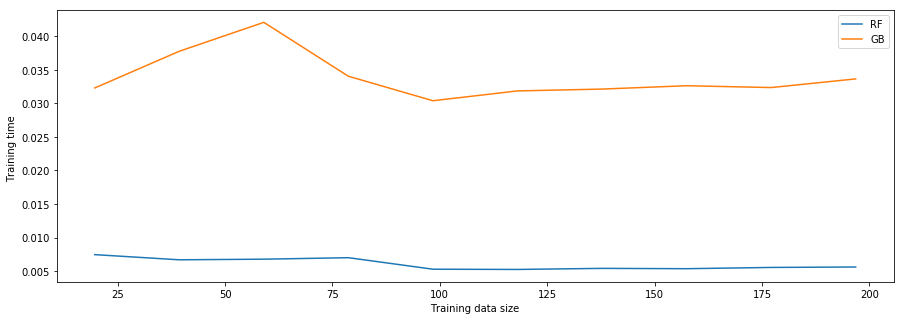

In [59]:
data=pd.read_csv('conference_attendance.csv')
data['tshirtSize'].fillna('M',inplace=True)
#### Convert non numerical data :
lb_make = LabelEncoder()
data['uni'] = lb_make.fit_transform(data['uni'])
data['tshirtSize'] = lb_make.fit_transform(data['tshirtSize'])
data['favSubject'] = lb_make.fit_transform(data['favSubject'])
response_to_question2(data,"isPresent")

# Dataset 2:

Random Forest default parameters :
Model accuracy :0.9605263157894737 and corresponding training time :0.00833892822265625
Model accuracy :0.9735099337748344 and corresponding training time :0.006829738616943359
Model accuracy :0.9647577092511013 and corresponding training time :0.00798177719116211
Model accuracy :0.9768211920529801 and corresponding training time :0.00932002067565918
Model accuracy :0.9629629629629629 and corresponding training time :0.010090827941894531
Model accuracy :0.9690949227373068 and corresponding training time :0.011150121688842773
Model accuracy :0.9715909090909091 and corresponding training time :0.016012907028198242
Model accuracy :0.9751655629139073 and corresponding training time :0.019124984741210938
Model accuracy :0.9734904270986745 and corresponding training time :0.014190196990966797
Model accuracy :0.9708609271523179 and corresponding training time :0.01958489418029785



Gradient Boosting default parameters :
Model accuracy :0.9736842105263158 an

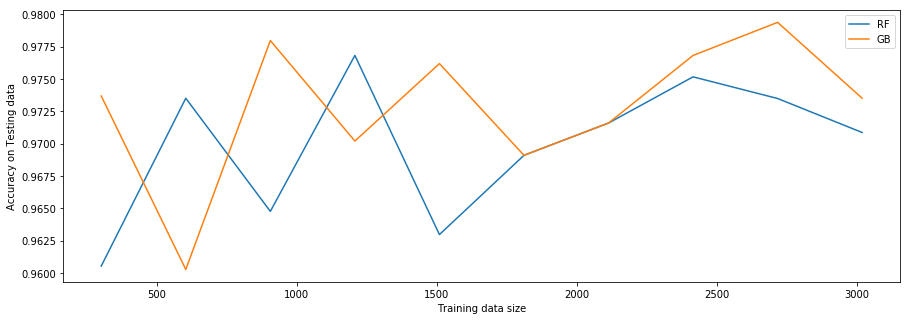

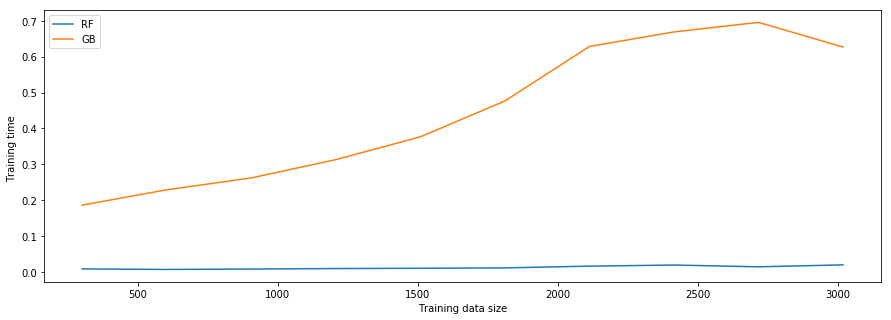

In [60]:
data=pd.read_csv('allbp.csv')
response_to_question2(data,"class")

# 3.

#### Interestingly, for both datasets, the. training time for Random Forest has been really low and almost constant no matter the size  of the training data. For Gradient Boosting, the second dataset shows the expected pattern with a training time increasing as we increase the training data size with . For the first dataset, the accuracy has been volatile and we can not conclude anything meaningful from that. This is due to the very small sample size. The second dataset shows the expected pattern : the more data we use for training,the better we will predict for both algorithms (even though at the beginning it is also volatile) . This is highlighted by both curves where we see that the accuracy increases with the size of the training data meaning that more data help the algorithms learn the true underlying distribution and therefore increase the prediction performances. Again, this shows the gap in ML between theory and practice and that the expected behavior is not always matched but we still have the trend that we look for.|

# Problem 4-

# 1-

#### By definition : $Precision=\frac{TP}{TP+FP}$ ; $Recall=\frac{TP}{TP+FN}$ ; $TPR=\frac{TP}{TP+FN}$ ; $FPR=\frac{FP}{FP+TN}$ and therefore the answer is that true negative only matter for ROC and NOT PR curves. TPR with FPR are misleading when the classes are unbalanced and this is why for PR we ignore TN ( think about tumor classification where the number of negative samples is is much higher in proportion than the positive ones and it would be easy to have really high accuracy by just predicting benign tumor all the time).

#### We use theorem 3.1 that proves that we have a one-to-one mapping between confusion matrices and points in PR space and therefore a one to one mapping between points since each point is defined by a confusion matrix in both PR and ROC curves.


# 2- 

All positive classifier: ROC AUC=0.500
Logistic Regression: ROC AUC=0.724
Adaboost: ROC AUC=0.790


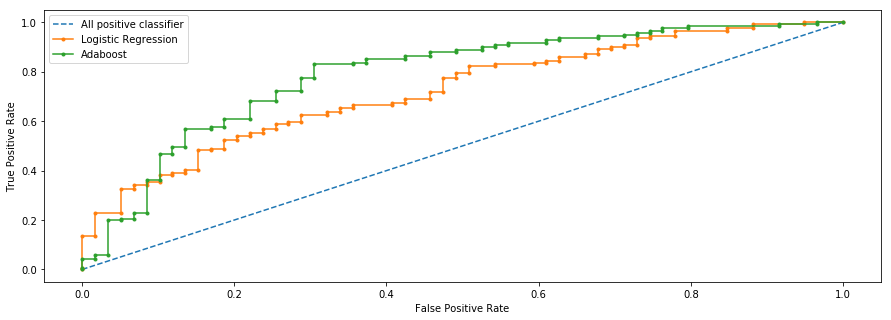

Logistic Regression : f1=0.817 auc=0.866
Adaboost : f1=0.846 auc=0.875
All Positive classifier : f1=0.827 auc=0.853


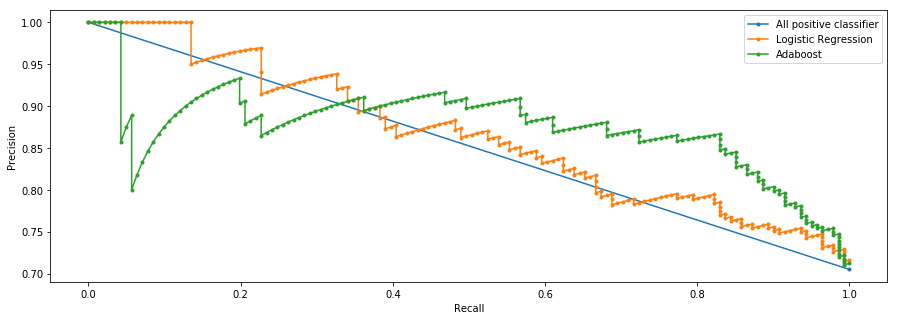

In [61]:
data= pd.read_csv('dataset_31_credit-g.csv')
# Label categorical variables with

lb_make = LabelEncoder()

for col in data.loc[:, data.dtypes == object].columns :
    data[col] = lb_make.fit_transform(data[col])

X = data.loc[:,data.columns!='class']
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
clf_Adaboost = AdaBoostClassifier()
clf_LR = LogisticRegression(random_state=42)
clf_Adaboost.fit(X_train, y_train)
clf_LR.fit(X_train, y_train)



majority_probs = [1 for _ in range(len(y_test))]

# predict probabilities
adaboost_probs = clf_Adaboost.predict_proba(X_test)

lr_probs = clf_LR.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
adaboost_probs = adaboost_probs[:, 1]
# calculate scores
majority_auc = roc_auc_score(y_test, majority_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
# summarize scores
print('All positive classifier: ROC AUC=%.3f' % (majority_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
print('Adaboost: ROC AUC=%.3f' % (adaboost_auc))
# calculate roc curves

majority_fpr, majority_tpr, _ = roc_curve(y_test, majority_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
# plot the roc curve for the model
plt.plot(majority_fpr, majority_tpr, linestyle='--', label='All positive classifier')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Adaboost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


# Predict class
adaboost_class = clf_Adaboost.predict(X_test)
lr_class = clf_LR.predict(X_test)
majority_class = majority_probs

adaboost_precision, adaboost_recall, _ = precision_recall_curve(y_test, adaboost_probs)
adaboost_f1, adaboost_aucPR = f1_score(y_test, adaboost_class), auc(adaboost_recall, adaboost_precision)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_aucPR = f1_score(y_test, lr_class), auc(lr_recall, lr_precision)

majority_precision, majority_recall, _ = precision_recall_curve(y_test, majority_probs)
majority_f1, majority_aucPR = f1_score(y_test, majority_class), auc(majority_recall, majority_precision)



# summarize scores
print('Logistic Regression : f1=%.3f auc=%.3f' % (lr_f1, lr_aucPR))
print('Adaboost : f1=%.3f auc=%.3f' % (adaboost_f1, adaboost_aucPR))
print('All Positive classifier : f1=%.3f auc=%.3f' % (majority_f1, majority_aucPR))
# plot the precision-recall curves


plt.plot(majority_recall, majority_precision, marker='.', label='All positive classifier')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
plt.plot(adaboost_recall, adaboost_precision, marker='.', label='Adaboost')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# 3-

### precision recall gain function from pyprg package :

In [19]:
#!/usr/bin/env python
""" Software to create Precision-Recall-Gain curves.
Precision-Recall-Gain curves and how to cite this work is available at
http://www.cs.bris.ac.uk/~flach/PRGcurves/.
"""

from __future__ import division
import warnings
import numpy as np
import matplotlib.pyplot as plt

def precision(tp, fn, fp, tn):
    with np.errstate(divide='ignore', invalid='ignore'):
        return tp/(tp + fp)


def recall(tp, fn, fp, tn):
    with np.errstate(divide='ignore', invalid='ignore'):
        return tp/(tp + fn)


def precision_gain(tp, fn, fp, tn):
    """Calculates Precision Gain from the contingency table
    This function calculates Precision Gain from the entries of the contingency
    table: number of true positives (TP), false negatives (FN), false positives
    (FP), and true negatives (TN). More information on Precision-Recall-Gain
    curves and how to cite this work is available at
    http://www.cs.bris.ac.uk/~flach/PRGcurves/.
    """
    n_pos = tp + fn
    n_neg = fp + tn
    with np.errstate(divide='ignore', invalid='ignore'):
        prec_gain = 1. - (n_pos/n_neg) * (fp/tp)
    if np.alen(prec_gain) > 1:
        prec_gain[tn + fn == 0] = 0
    elif tn + fn == 0:
        prec_gain = 0
    return prec_gain


def recall_gain(tp, fn, fp, tn):
    """Calculates Recall Gain from the contingency table
    This function calculates Recall Gain from the entries of the contingency
    table: number of true positives (TP), false negatives (FN), false positives
    (FP), and true negatives (TN). More information on Precision-Recall-Gain
    curves and how to cite this work is available at
    http://www.cs.bris.ac.uk/~flach/PRGcurves/.
    Args:
        tp (float) or ([float]): True Positives
        fn (float) or ([float]): False Negatives
        fp (float) or ([float]): False Positives
        tn (float) or ([float]): True Negatives
    Returns:
        (float) or ([float])
    """
    n_pos = tp + fn
    n_neg = fp + tn
    with np.errstate(divide='ignore', invalid='ignore'):
        rg = 1. - (n_pos/n_neg) * (fn/tp)
    if np.alen(rg) > 1:
        rg[tn + fn == 0] = 1
    elif tn + fn == 0:
        rg = 1
    return rg


def create_segments(labels, pos_scores, neg_scores):
    n = np.alen(labels)
    # reorder labels and pos_scores by decreasing pos_scores, using increasing neg_scores in breaking ties
    new_order = np.lexsort((neg_scores, -pos_scores))
    labels = labels[new_order]
    pos_scores = pos_scores[new_order]
    neg_scores = neg_scores[new_order]
    # create a table of segments
    segments = {'pos_score': np.zeros(n), 'neg_score': np.zeros(n),
                'pos_count': np.zeros(n), 'neg_count': np.zeros(n)}
    j = -1
    for i, label in enumerate(labels):
        if ((i == 0) or (pos_scores[i-1] != pos_scores[i])
                     or (neg_scores[i-1] != neg_scores[i])):
            j += 1
            segments['pos_score'][j] = pos_scores[i]
            segments['neg_score'][j] = neg_scores[i]
        if label == 0:
            segments['neg_count'][j] += 1
        else:
            segments['pos_count'][j] += 1
    segments['pos_score'] = segments['pos_score'][0:j+1]
    segments['neg_score'] = segments['neg_score'][0:j+1]
    segments['pos_count'] = segments['pos_count'][0:j+1]
    segments['neg_count'] = segments['neg_count'][0:j+1]
    return segments


def get_point(points, index):
    keys = points.keys()
    point = np.zeros(np.alen(keys))
    key_indices = dict()
    for i, key in enumerate(keys):
        point[i] = points[key][index]
        key_indices[key] = i
    return [point, key_indices]


def insert_point(new_point, key_indices, points, precision_gain=0,
        recall_gain=0, is_crossing=0):
    for key in key_indices.keys():
        points[key] = np.insert(points[key], 0, new_point[key_indices[key]])
    points['precision_gain'][0] = precision_gain
    points['recall_gain'][0] = recall_gain
    points['is_crossing'][0] = is_crossing
    new_order = np.lexsort((-points['precision_gain'],points['recall_gain']))
    for key in points.keys():
        points[key] = points[key][new_order]
    return points


def _create_crossing_points(points, n_pos, n_neg):
    n = n_pos+n_neg
    points['is_crossing'] = np.zeros(np.alen(points['pos_score']))
    # introduce a crossing point at the crossing through the y-axis
    j = np.amin(np.where(points['recall_gain'] >= 0)[0])
    if points['recall_gain'][j] > 0:  # otherwise there is a point on the boundary and no need for a crossing point
        [point_1, key_indices_1] = get_point(points, j)
        [point_2, key_indices_2] = get_point(points, j-1)
        delta = point_1 - point_2
        if delta[key_indices_1['TP']] > 0:
            alpha = (n_pos*n_pos/n - points['TP'][j-1]) / delta[key_indices_1['TP']]
        else:
            alpha = 0.5

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            new_point = point_2 + alpha*delta

        new_prec_gain = precision_gain(new_point[key_indices_1['TP']], new_point[key_indices_1['FN']],
                                       new_point[key_indices_1['FP']], new_point[key_indices_1['TN']])
        points = insert_point(new_point, key_indices_1, points,
                              precision_gain=new_prec_gain, is_crossing=1)

    # now introduce crossing points at the crossings through the non-negative part of the x-axis
    x = points['recall_gain']
    y = points['precision_gain']
    temp_y_0 = np.append(y, 0)
    temp_0_y = np.append(0, y)
    temp_1_x = np.append(1, x)
    with np.errstate(invalid='ignore'):
        indices = np.where(np.logical_and((temp_y_0 * temp_0_y < 0), (temp_1_x >= 0)))[0]
    for i in indices:
        cross_x = x[i-1] + (-y[i-1]) / (y[i] - y[i-1]) * (x[i] - x[i-1])
        [point_1, key_indices_1] = get_point(points, i)
        [point_2, key_indices_2] = get_point(points, i-1)
        delta = point_1 - point_2
        if delta[key_indices_1['TP']] > 0:
            alpha = (n_pos * n_pos / (n - n_neg * cross_x) - points['TP'][i-1]) / delta[key_indices_1['TP']]
        else:
            alpha = (n_neg / n_pos * points['TP'][i-1] - points['FP'][i-1]) / delta[key_indices_1['FP']]

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            new_point = point_2 + alpha*delta

        new_rec_gain = recall_gain(new_point[key_indices_1['TP']], new_point[key_indices_1['FN']],
                                   new_point[key_indices_1['FP']], new_point[key_indices_1['TN']])
        points = insert_point(new_point, key_indices_1, points,
                              recall_gain=new_rec_gain, is_crossing=1)
        i += 1
        indices += 1
        x = points['recall_gain']
        y = points['precision_gain']
        temp_y_0 = np.append(y, 0)
        temp_0_y = np.append(0, y)
        temp_1_x = np.append(1, x)
    return points


def create_prg_curve(labels, pos_scores, neg_scores=[]):
    """Precision-Recall-Gain curve
    This function creates the Precision-Recall-Gain curve from the vector of
    labels and vector of scores where higher score indicates a higher
    probability to be positive. More information on Precision-Recall-Gain
    curves and how to cite this work is available at
    http://www.cs.bris.ac.uk/~flach/PRGcurves/.
    """
    create_crossing_points = True # do it always because calc_auprg otherwise gives the wrong result
    if np.alen(neg_scores) == 0:
        neg_scores = -pos_scores
    n = np.alen(labels)
    n_pos = np.sum(labels)
    n_neg = n - n_pos
    # convert negative labels into 0s
    labels = 1 * (labels == 1)
    segments = create_segments(labels, pos_scores, neg_scores)
    # calculate recall gains and precision gains for all thresholds
    points = dict()
    points['pos_score'] = np.insert(segments['pos_score'], 0, np.inf)
    points['neg_score'] = np.insert(segments['neg_score'], 0, -np.inf)
    points['TP'] = np.insert(np.cumsum(segments['pos_count']), 0, 0)
    points['FP'] = np.insert(np.cumsum(segments['neg_count']), 0, 0)
    points['FN'] = n_pos - points['TP']
    points['TN'] = n_neg - points['FP']
    points['precision'] = precision(points['TP'], points['FN'], points['FP'], points['TN'])
    points['recall'] = recall(points['TP'], points['FN'], points['FP'], points['TN'])
    points['precision_gain'] = precision_gain(points['TP'], points['FN'], points['FP'], points['TN'])
    points['recall_gain'] = recall_gain(points['TP'], points['FN'], points['FP'], points['TN'])
    if create_crossing_points == True:
        points = _create_crossing_points(points, n_pos, n_neg)
    else:
        points['pos_score'] = points['pos_score'][1:]
        points['neg_score'] = points['neg_score'][1:]
        points['TP'] = points['TP'][1:]
        points['FP'] = points['FP'][1:]
        points['FN'] = points['FN'][1:]
        points['TN'] = points['TN'][1:]
        points['precision_gain'] = points['precision_gain'][1:]
        points['recall_gain'] = points['recall_gain'][1:]
    with np.errstate(invalid='ignore'):
        points['in_unit_square'] = np.logical_and(points['recall_gain'] >= 0,
                                              points['precision_gain'] >= 0)
    return points


def calc_auprg(prg_curve):
    """Calculate area under the Precision-Recall-Gain curve
    This function calculates the area under the Precision-Recall-Gain curve
    from the results of the function create_prg_curve. More information on
    Precision-Recall-Gain curves and how to cite this work is available at
    http://www.cs.bris.ac.uk/~flach/PRGcurves/.
    """
    area = 0
    recall_gain = prg_curve['recall_gain']
    precision_gain = prg_curve['precision_gain']
    for i in range(1,len(recall_gain)):
        if (not np.isnan(recall_gain[i-1])) and (recall_gain[i-1]>=0):
            width = recall_gain[i]-recall_gain[i-1]
            height = (precision_gain[i]+precision_gain[i-1])/2
            area += width*height
    return(area)


# from
def convex_hull(points):
    """Computes the convex hull of a set of 2D points.
    Input: an iterable sequence of (x, y) pairs representing the points.
    Output: a list of vertices of the convex hull in counter-clockwise order,
      starting from the vertex with the lexicographically smallest coordinates.
    Implements Andrew's monotone chain algorithm. O(n log n) complexity.
    Source code from:
    https://en.wikibooks.org/wiki/Algorithm_Implementation/Geometry/Convex_hull/Monotone_chain
    """

    # Sort the points lexicographically (tuples are compared lexicographically).
    # Remove duplicates to detect the case we have just one unique point.
    points = sorted(set(points))

    # Boring case: no points or a single point, possibly repeated multiple times.
    if len(points) <= 1:
        return points

    # 2D cross product of OA and OB vectors, i.e. z-component of their 3D cross product.
    # Returns a positive value, if OAB makes a counter-clockwise turn,
    # negative for clockwise turn, and zero if the points are collinear.
    def cross(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

    # Build upper hull
    upper = []
    for p in reversed(points):
        while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
            upper.pop()
        upper.append(p)

    return upper


def plot_prg(prg_curve,show_convex_hull=True,show_f_calibrated_scores=False):
    """Plot the Precision-Recall-Gain curve
    This function plots the Precision-Recall-Gain curve resulting from the
    function create_prg_curve using ggplot. More information on
    Precision-Recall-Gain curves and how to cite this work is available at
    http://www.cs.bris.ac.uk/~flach/PRGcurves/.
    @param prg_curve the data structure resulting from the function create_prg_curve
    @param show_convex_hull whether to show the convex hull (default: TRUE)
    @param show_f_calibrated_scores whether to show the F-calibrated scores (default:TRUE)
    @return the ggplot object which can be plotted using print()
    @details This function plots the Precision-Recall-Gain curve, indicating
        for each point whether it is a crossing-point or not (see help on
        create_prg_curve). By default, only the part of the curve
        within the unit square [0,1]x[0,1] is plotted.
    @examples
        labels = c(1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1)
        scores = (25:1)/25
        plot_prg(create_prg_curve(labels,scores))
    """
    pg = prg_curve['precision_gain']
    rg = prg_curve['recall_gain']

    fig = plt.figure(figsize=(6,5))
    plt.clf()
    plt.axes(frameon=False)
    ax = fig.gca()
    ax.set_xticks(np.arange(0,1.25,0.25))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.grid(b=True)
    ax.set_xlim((-0.05,1.02))
    ax.set_ylim((-0.05,1.02))
    ax.set_aspect('equal')
    # Plot vertical and horizontal lines crossing the 0 axis
    plt.axvline(x=0, ymin=-0.05, ymax=1, color='k')
    plt.axhline(y=0, xmin=-0.05, xmax=1, color='k')
    plt.axvline(x=1, ymin=0, ymax=1, color='k')
    plt.axhline(y=1, xmin=0, xmax=1, color='k')
    # Plot cyan lines
    indices = np.arange(np.argmax(prg_curve['in_unit_square']) - 1,
                        len(prg_curve['in_unit_square']))
    plt.plot(rg[indices], pg[indices], 'c-', linewidth=2)
    # Plot blue lines
    indices = np.logical_or(prg_curve['is_crossing'],
                       prg_curve['in_unit_square'])
    plt.plot(rg[indices], pg[indices], 'b-', linewidth=2)
    # Plot blue dots
    indices = np.logical_and(prg_curve['in_unit_square'],
                             True - prg_curve['is_crossing'])
    plt.scatter(rg[indices], pg[indices], marker='o', color='b', s=40)
    # Plot lines out of the boundaries
    plt.xlabel('Recall Gain')
    plt.ylabel('Precision Gain')

    valid_points = np.logical_and( ~ np.isnan(rg), ~ np.isnan(pg))
    upper_hull = convex_hull(zip(rg[valid_points],pg[valid_points]))
    rg_hull, pg_hull = zip(*upper_hull)
    if show_convex_hull:
        plt.plot(rg_hull, pg_hull, 'r--')
    if show_f_calibrated_scores:
        raise Exception("Show calibrated scores not implemented yet")
    plt.show()
    return fig


def plot_pr(prg_curve):
    p = prg_curve['precision']
    r = prg_curve['recall']

    fig = plt.figure(figsize=(6,5))
    plt.clf()
    plt.axes(frameon=False)
    ax = fig.gca()
    ax.set_xticks(np.arange(0,1.25,0.25))
    ax.set_yticks(np.arange(0,1.25,0.25))
    ax.grid(b=True)
    ax.set_xlim((-0.05,1.02))
    ax.set_ylim((-0.05,1.02))
    ax.set_aspect('equal')
    # Plot vertical and horizontal lines crossing the 0 axis
    plt.axvline(x=0, ymin=-0.05, ymax=1, color='k')
    plt.axhline(y=0, xmin=-0.05, xmax=1, color='k')
    plt.axvline(x=1, ymin=0, ymax=1, color='k')
    plt.axhline(y=1, xmin=0, xmax=1, color='k')
    # Plot blue lines
    plt.plot(r, p, 'ob-', linewidth=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')

    plt.show()
    return fig


def test():
    labels = np.array([1,1,1,0,1,1,1,1,1,1,0,1,1,1,0,1,0,0,1,0,0,0,1,0,1], dtype='int')
    scores = np.around(np.log(np.arange(1,26)[::-1]),1)
    scores = np.arange(1,26)[::-1]
    prg_curve = create_prg_curve(labels, scores)
    auprg = calc_auprg(prg_curve)
    plot_prg(prg_curve)


if __name__ == '__main__':
    pass



In [62]:
adaboost_prg_curve = create_prg_curve(y_test, adaboost_class)
adaboost_auprg = calc_auprg(adaboost_prg_curve)
print('Adaboost : AUROC=%.3f  AUPR=%.3f  AUPRG=%.3f' % (adaboost_auc, adaboost_aucPR, adaboost_auprg))

lr_prg_curve = create_prg_curve(y_test, lr_class)
lr_auprg = calc_auprg(lr_prg_curve)
print('Logistic Regression : AUROC=%.3f  AUPR=%.3f  AUPRG=%.3f' % (lr_auc, lr_aucPR, lr_auprg))



Adaboost : AUROC=0.790  AUPR=0.875  AUPRG=0.444
Logistic Regression : AUROC=0.724  AUPR=0.866  AUPRG=0.498


#### Interestingly , using the AUPRG for performance evaluation, Logistic Regression seem to be a better candidate.  Without this metric, I might have decided to opt for Adaboost because both AUROC and AUPR are higher 


#### I agree with the authors of this paper to use PRG curves instead of PR curves mostly due to the interpretability of a single metric which is the AUPRG representing a measure of ranking performance and therefore allows simple and fair comparison between different algorithms on unbalanced data. Also, this modification of PR curves inherit the benefits previously demonstrated of a simple ROC analysis . Therefore, we can think of AUPRG as a combination of the benefits from both PR and ROC curves .